# The Dice game
This Jupyter notebook introduces the dynamics of the dice game. The rules are simple: 
- First we choose a positive number (standardly 21), which is going to fix the sum of the number of dots on each die. In the code, we call this number `checksum`
- Each player creates his/her own 6-sided die, which has non-negative integer number of dots on each of its side. E.g., if the `checksum = 21`, one die can have the values `[6,5,4,3,2,1]`.
- The players compete against each other by throwing their dice and comparing the numbers on them. Higher roll wins.

Run the following block, which defines all the commands needed.

In [1]:
from random import sample
from matplotlib import pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
from pandas import DataFrame as df
import numpy as np
%matplotlib inline

class Dice:
    def __init__(self, checksum, alldice = False):
        self.checksum = checksum
        self.dice = dict()
        self.names = []
        self.data = []
        if alldice:
            self.add_all_players()
    def add_all_players(self):
        def create_name(die):
            return '.'.join([str(d) for d in die])
        
        levels = [[] for i in range(self.checksum+1)]
        levels[0].append([])
        for l in range(1,len(levels)):
            for j in range(1,l+1):
                for x in levels[l-j]:
                    if len(x) < 6 and (len(x) == 0 or x[-1] >= j):
                        levels[l].append([*x, j])
        for die in levels[-1]:
            die += (6-len(die))*[0]
            name = create_name(die)
            self.dice[name] = die
            self.names.append(name)
    def add_player(self, name, values):
        if len(values) == 6:
            if sum(values) == self.checksum:
                self.dice[name] = values
                self.dice[name].sort()
                self.names.append(name)
            else:
                print(name + ": Sum is incorrect!")
        else:
            print(name + ": A die has 6 sides!")
    def probability(self, name1, name2):
        w = 0.0
        l = 0.0
        d = 0.0
        for i in self.dice[name1]:
            for j in self.dice[name2]:
                if i > j:
                    w += 1
                elif i < j:
                    l += 1
                else:
                    d += 1
        return [round(x/36,3) for x in [w,l,d]]
    def allvsall(self):
        self.data = [[self.probability(name1,name2) for name1 in self.names] for name2 in self.names]
    def heatmap(self,f, cm):
        data = [[f(x) for x in a] for a in reversed(self.data)]
        plt.pcolor(data, cmap=cm)
        ax = plt.gca()
        plt.xticks([0.5+i for i in range(len(self.names))], self.names, rotation='vertical')
        plt.yticks([0.5+i for i in range(len(self.names))], list(reversed(self.names)), rotation='horizontal')
        ax.xaxis.set_tick_params(labeltop='on')
        plt.colorbar()
        plt.show()
    def compute_stats(self):
        self.prob_stats = df()
        self.match_stats = df()
        data = self.data[:][:][:]
        for i in range(len(data)):
            data[i] = data[i][:i] + data[i][i+1:]
        self.prob_stats["wins"] = [round(np.mean([x[1] for x in p]),3) for p in data]
        self.prob_stats["loses"] = [round(np.mean([x[0] for x in p]),3) for p in data]
        self.prob_stats["draws"] = [round(np.mean([x[2] for x in p]),3) for p in data]
        self.prob_stats["wins-loses"] = self.prob_stats["wins"] - self.prob_stats["loses"]
        self.match_stats["wins"] = [int(np.sum([x[1] > x[0] for x in p])) for p in data]
        self.match_stats["loses"] = [int(np.sum([x[0] > x[1] for x in p])) for p in data]
        self.match_stats["draws"] = [int(np.sum([x[0] == x[1] for x in p])) for p in data]
        self.match_stats["wins- loses"] = self.match_stats["wins"] - self.match_stats["loses"]
        self.match_stats["wins/loses"] = np.round(np.divide(self.match_stats["wins"], self.match_stats["loses"]), 3)
        self.prob_stats.index = self.names
        self.match_stats.index = self.names
    def compute_all(self):
        self.allvsall()
        self.compute_stats()

## Initialization
Run one of the following blocks to initialize the game. The first block includes all the possible dice for a given sum. The other two initializations were created during two talks on this topic.

In [192]:
game = Dice(21, alldice=True)
game.compute_all()

In [201]:
game = Dice(21) 
game.add_player("Veronika1",[6,5,4,3,2,1])
game.add_player("Mišo1",[5,5,5,4,1,1])
game.add_player("Samko1",[5,5,3,3,4,1])
game.add_player("KUBO",[7,7,7,0,0,0])
game.add_player("Tonda",[1,4,4,4,4,4])
game.add_player("Hanka",[8,6,6,1,0,0])
game.add_player("Samko2",[10,10,1,0,0,0])
game.add_player("Andrej",[4,4,4,4,4,1])
game.add_player("Matúš",[10,5,5,1,0,0])
game.add_player("Dominik",[6,6,6,1,1,1])
game.add_player("Zvono",[5,5,5,6,0,0])
game.add_player("Alan",[2,1,7,0,6,5])
game.add_player("Lukáš",[5,4,4,4,4,0])
game.add_player("Lukáš2",[7,7,2,2,2,1])
game.add_player("Lucka",[3,3,3,0,6,6])
game.add_player("Martin",[2,3,4,5,3,4])
game.add_player("Daniel",[5,5,5,3,3,0])
game.add_player("Marián",[6,6,3,3,2,1])
game.add_player("Lukáš1",[6,4,4,3,3,1])
game.add_player("Viky",[7,7,2,2,2,1])

game.compute_all()

## Plots
In the following section we include basic plots showing the results of matches between participants. The table gets unreadable for more than twenty participants.

### Wins
Probability of the row player winning a single roll against the column player.

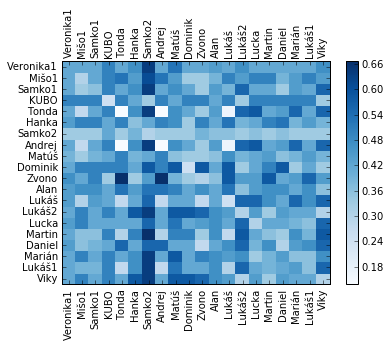

In [202]:
game.heatmap(lambda x: x[1], "Blues")

### Loses
Probability of the row player losing a single roll against the column player (the above table transposed).

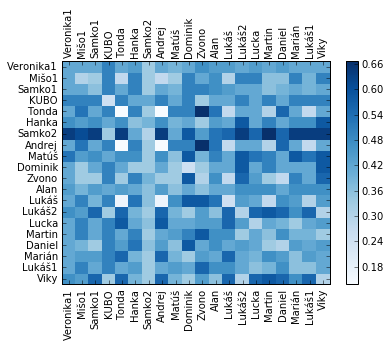

In [203]:
game.heatmap(lambda x: x[0], "Blues")

### Draws
Probability of the row player drawing a single roll against the column player.

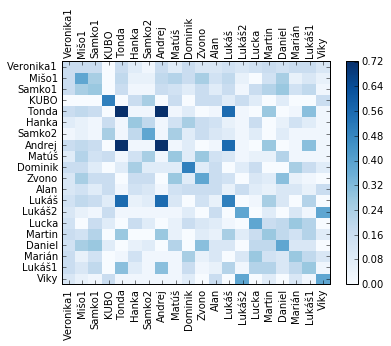

In [204]:
game.heatmap(lambda x: x[2], "Blues")

### Wins - Loses
The difference between the probability of winning and losing for the row player over the column player.

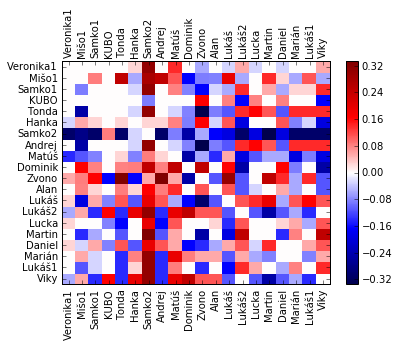

In [205]:
game.heatmap(lambda x: x[1] - x[0], "seismic")

### Result of infinite matches
The above table discretized to wins/draws/losses.

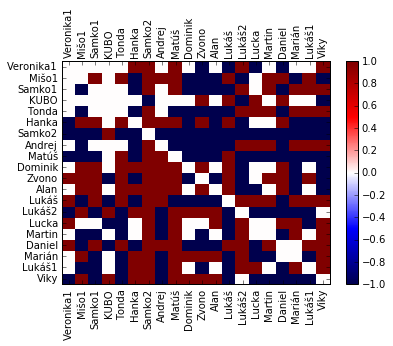

In [206]:
game.heatmap(lambda x: np.sign(x[1] - x[0]), "seismic")

## Stats
In this section we show all the relavant stats for this game.

### Based on probabilities
In this part we base everything on probabilities. The following code prints out the best dice on average based on a given attribute. The default attribute is `"wins-loses"`, but feel free to uncomment the other lines to sort the table in a different way. Change the value `top = 20` to show less/more dice.

In [207]:
top = 20
game.prob_stats.sort_values("wins-loses", ascending=False)[:top]
#game.prob_stats.sort_values("wins", ascending=False)[:top]
#game.prob_stats.sort_values("loses")[:top]
#game.prob_stats.sort_values("draws", ascending=False)[:top]

,wins,loses,draws,wins-loses
Dominik,0.474,0.421,0.105,0.053
Zvono,0.465,0.415,0.120,0.050
Mišo1,0.456,0.409,0.135,0.047
Alan,0.460,0.430,0.110,0.030
Veronika1,0.449,0.425,0.126,0.024
Daniel,0.452,0.430,0.118,0.022
Marián,0.456,0.440,0.104,0.016
Samko1,0.442,0.427,0.132,0.015
Lukáš,0.434,0.421,0.145,0.013
Lukáš2,0.468,0.461,0.072,0.007


### Based on matches
In this part we base everything on match results, i.e., discretized versions of `"wins-loses"` to wins/losses/draws from above. The following code prints out the best dice on average based on a given attribute. The default attribute is `"wins-loses"`, but feel free to uncomment the other lines to sort the table in a different way. Change the value `top = 20` to show less/more dice. The value of `wins/loses` might be an infinity, which would mean that there is a die which never loses.

In [208]:
top = 20
game.match_stats.sort_values("wins-loses", ascending=False)[:top]
#game.match_stats.sort_values("wins/loses", ascending=False)[:top]
#game.match_stats.sort_values("wins", ascending=False)[:top]
#game.match_stats.sort_values("loses")[:top]
#game.match_stats.sort_values("draws", ascending=False)[:top]

KeyError: 'wins-loses'

## Test pre listicku

In [11]:
a = np.exp(1j*np.pi)

pole = np.zeros(5,dtype=complex)
pole[1] = a

print(pole)

[ 0. +0.00000000e+00j -1. +1.22464680e-16j  0. +0.00000000e+00j
  0. +0.00000000e+00j  0. +0.00000000e+00j]
